# EFA

In [2]:
# import notebook.services.api.handlers
import pandas as pd

import utils
# from models.VAE import *

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
# clustering namespaces
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from factor_analyzer import FactorAnalyzer
from statsmodels.multivariate.pca import PCA

import numpy as np
# import tensorflow_probability as tfp
# import tensorflow as tf
# from tensorflow.keras.callbacks import EarlyStopping
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, mean_squared_error
import seaborn as sns
from sklearn.manifold import TSNE
plt.rcParams['figure.figsize'] = (10, 8)
import warnings
warnings.filterwarnings('ignore')
save_dir = 'saved_models/tfp'

In [3]:
test_size = 0.2     # train-test split

# normal with subjective meassures = TRUE/FALSE
# dat, X_0, y_0, _, _, _, _ = load_data(group=group, test_size=test_size, sub=True) # subjectives = True
# dat, _, _, X, X_test, y, y_test = load_data(group=group, test_size=test_size, sub=False)

dat = pd.read_csv('../data/merged_male.csv')

y_0 = dat['LZ']
dat = dat.drop(['TalentID', 'AK', 'LZ'], axis=1).reset_index(drop=True)
X_0 = dat.iloc[:,:]


X, X_test, y, y_test = train_test_split(X_0, y_0, test_size=test_size, random_state=42, stratify=y_0)


X_0_names = list(X.columns)
X_names = ['Birthday', 'height', 'weight', 'SL20', 'GW','DR','BK','BJ','SKSC_TAK','SKSC_TEC','SKSC_KON','SKSC_PSY']
# ___ SCALING
df = X
scaler = StandardScaler().fit(X)
df = scaler.transform(df)

data = dat.copy()
scaler_data = StandardScaler().fit(data)
data = scaler_data.transform(data)

data = pd.DataFrame(data, columns=dat.columns)

### Bartlett’s test for adequancy
We want a significant result to see if the covariance matrix is not the identity

In [4]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

(np.float64(84886.06137474258), np.float64(0.0))

### Number of factors

In [4]:
# We want eigenvalues bigger than one (Kaiser criterion)
fa = FactorAnalyzer()
fa.fit(data)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.32797257, 1.5378693 , 1.31439174, 1.09673014, 0.9925896 ,
       0.83008036, 0.72658515, 0.66215569, 0.50653779, 0.44046942,
       0.3432875 , 0.22133074])

In [5]:
fa.get_factor_variance()

(array([2.47902722, 1.67241493, 0.6432159 ]),
 array([0.2065856 , 0.13936791, 0.05360132]),
 array([0.2065856 , 0.34595351, 0.39955484]))

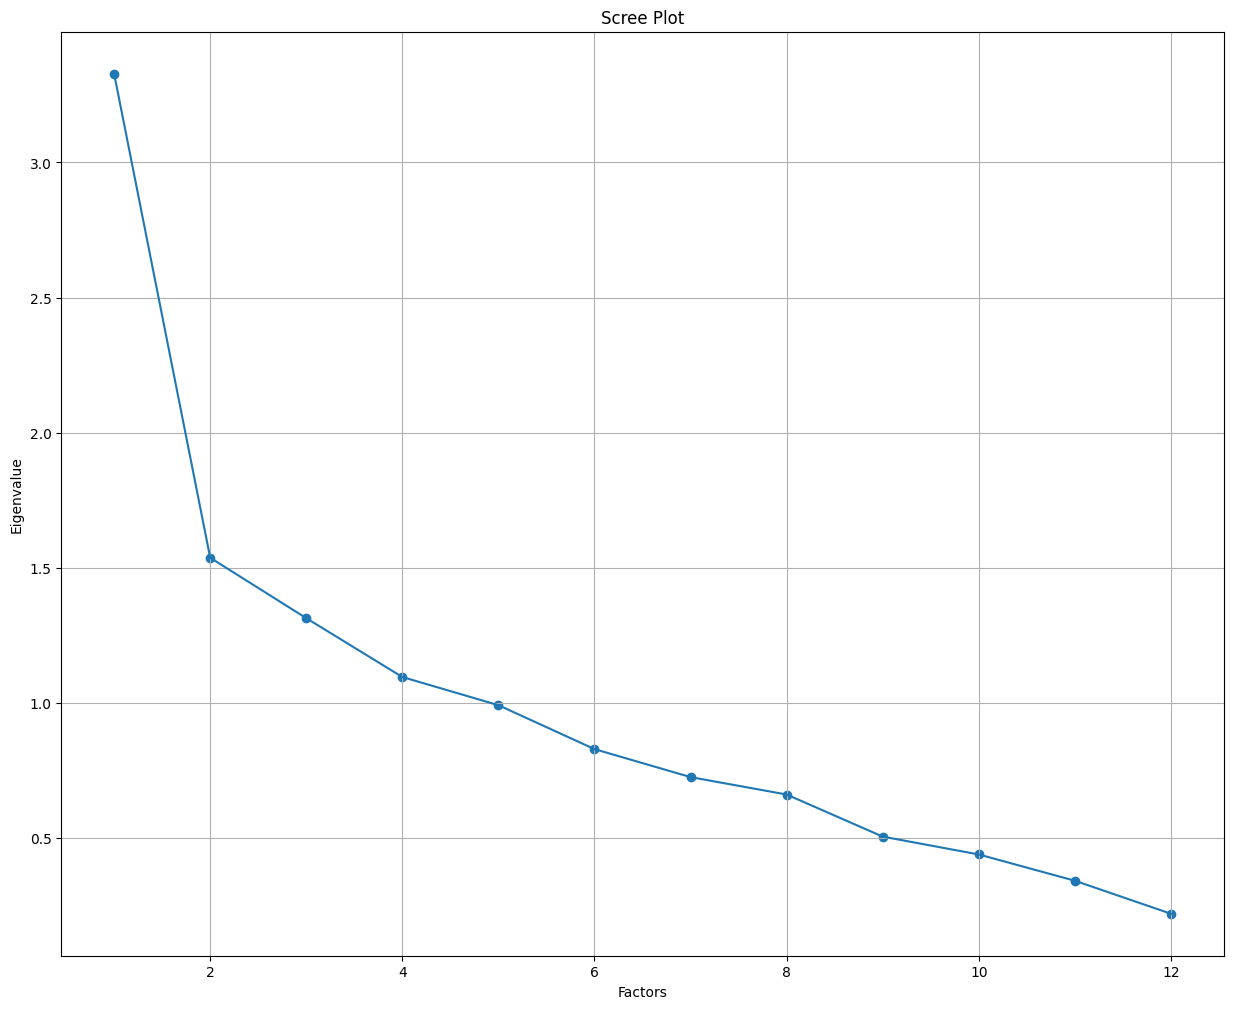

In [6]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()

### EFA

In [7]:
# Create factor analysis object and perform factor analysis
EFA = FactorAnalyzer(n_factors=4, rotation='varimax')
EFA.fit(data)

,n_factors,4
,rotation,'varimax'
,method,'minres'
,use_smc,True
,is_corr_matrix,False
,bounds,"(0.005, ...)"
,impute,'median'
,svd_method,'randomized'
,rotation_kwargs,{}


[Text(0.5, 1.0, 'EFA loadings (b)')]

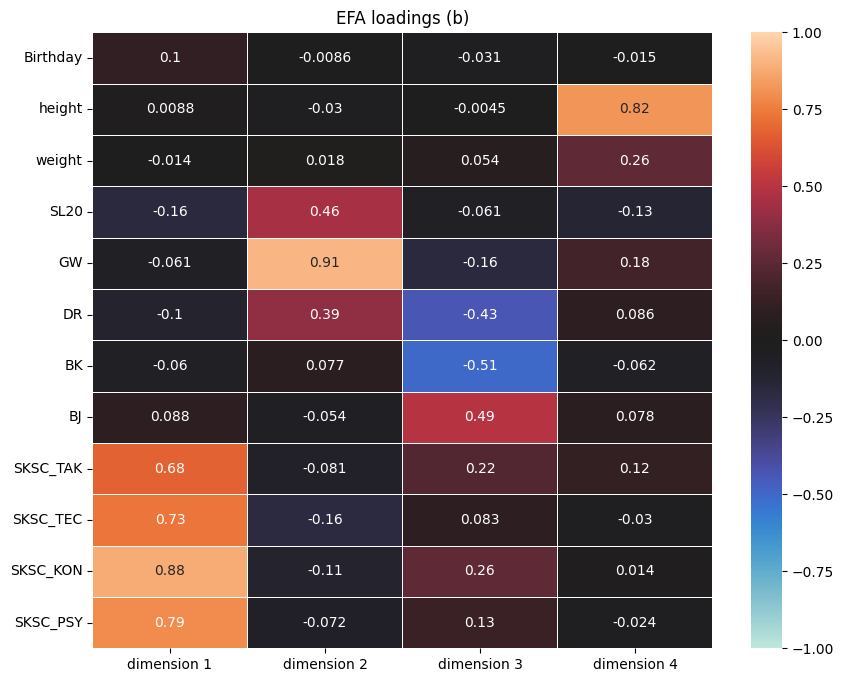

In [8]:
plt.subplots(figsize=(10,8))
sns.heatmap(data=EFA.loadings_, annot=True, linewidths=0.5, vmin=-1, vmax=1, center=0, xticklabels=["dimension 1", "dimension 2","dimension 3","dimension 4"], yticklabels=X_names).set(title='EFA loadings (b)')

In [9]:
EFA.get_eigenvalues()

(array([3.32797257, 1.5378693 , 1.31439174, 1.09673014, 0.9925896 ,
        0.83008036, 0.72658515, 0.66215569, 0.50653779, 0.44046942,
        0.3432875 , 0.22133074]),
 array([ 2.95070340e+00,  1.16806945e+00,  8.06591080e-01,  4.70250641e-01,
         9.08081234e-02,  7.37137028e-02,  1.22370443e-02,  1.50783369e-03,
        -7.82201190e-03, -3.71746364e-02, -4.44720236e-02, -8.88019763e-02]))

In [10]:
EFA.get_communalities()

array([0.01173752, 0.67360952, 0.07313352, 0.25572689, 0.89032517,
       0.3620996 , 0.27079559, 0.25994835, 0.52693897, 0.56918252,
       0.85057334, 0.65153962])

In [11]:
EFA.get_factor_variance()
# 1. Sum of squared loadings (variance)
# 2. Proportional variance
# 3. Cumulative variance

(array([2.4500519 , 1.25567166, 0.8663334 , 0.82355368]),
 array([0.20417099, 0.1046393 , 0.07219445, 0.06862947]),
 array([0.20417099, 0.3088103 , 0.38100475, 0.44963422]))